## Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Data Processing


In [ ]:
## loading the data from csv file
car_dataset = pd.read_csv('/content/car-data.csv')



In [ ]:
## the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## checking the unique value


In [ ]:
car_dataset['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
car_dataset['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
car_dataset['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
# checking the number of rows and colums
car_dataset.shape

(301, 9)

In [ ]:
# gettig some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
# Determining the object data and the numerical data
obj_data = car_dataset.select_dtypes(include='object')
num_data = car_dataset.select_dtypes(exclude='object')

In [ ]:
print(obj_data)
print(num_data)

    Car_Name Fuel_Type Seller_Type Transmission
0       ritz    Petrol      Dealer       Manual
1        sx4    Diesel      Dealer       Manual
2       ciaz    Petrol      Dealer       Manual
3    wagon r    Petrol      Dealer       Manual
4      swift    Diesel      Dealer       Manual
..       ...       ...         ...          ...
296     city    Diesel      Dealer       Manual
297     brio    Petrol      Dealer       Manual
298     city    Petrol      Dealer       Manual
299     city    Diesel      Dealer       Manual
300     brio    Petrol      Dealer       Manual

[301 rows x 4 columns]
     Year  Selling_Price  Present_Price  Kms_Driven  Owner
0    2014           3.35           5.59       27000      0
1    2013           4.75           9.54       43000      0
2    2017           7.25           9.85        6900      0
3    2011           2.85           4.15        5200      0
4    2014           4.60           6.87       42450      0
..    ...            ...            ...       

## Encoding the Categorical Data


In [ ]:
for feature in obj_data.columns:
    le = LabelEncoder()
    obj_data[feature] = le.fit_transform(obj_data[feature])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Aggregating the dataset after conducting encoding
car_df = pd.concat([obj_data,num_data], axis=1)

In [ ]:
# Inspecting the first 5 rows of the dataset
car_df.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,90,2,0,1,2014,3.35,5.59,27000,0
1,93,1,0,1,2013,4.75,9.54,43000,0
2,68,2,0,1,2017,7.25,9.85,6900,0
3,96,2,0,1,2011,2.85,4.15,5200,0
4,92,1,0,1,2014,4.60,6.87,42450,0


               Car_Name  Fuel_Type  Seller_Type  Transmission      Year  \
Car_Name       1.000000  -0.371446    -0.829718     -0.059855  0.017265   
Fuel_Type     -0.371446   1.000000     0.352415      0.080466 -0.053643   
Seller_Type   -0.829718   0.352415     1.000000      0.063240 -0.039896   
Transmission  -0.059855   0.080466     0.063240      1.000000  0.000394   
Year           0.017265  -0.053643    -0.039896      0.000394  1.000000   
Selling_Price  0.499198  -0.509467    -0.550724     -0.367128  0.236141   
Present_Price  0.475539  -0.440415    -0.512030     -0.348715 -0.047584   
Kms_Driven     0.064453  -0.166801    -0.101419     -0.162510 -0.524342   
Owner         -0.081192   0.055705     0.124269     -0.050316 -0.182104   

               Selling_Price  Present_Price  Kms_Driven     Owner  
Car_Name            0.499198       0.475539    0.064453 -0.081192  
Fuel_Type          -0.509467      -0.440415   -0.166801  0.055705  
Seller_Type        -0.550724      -0.512030  

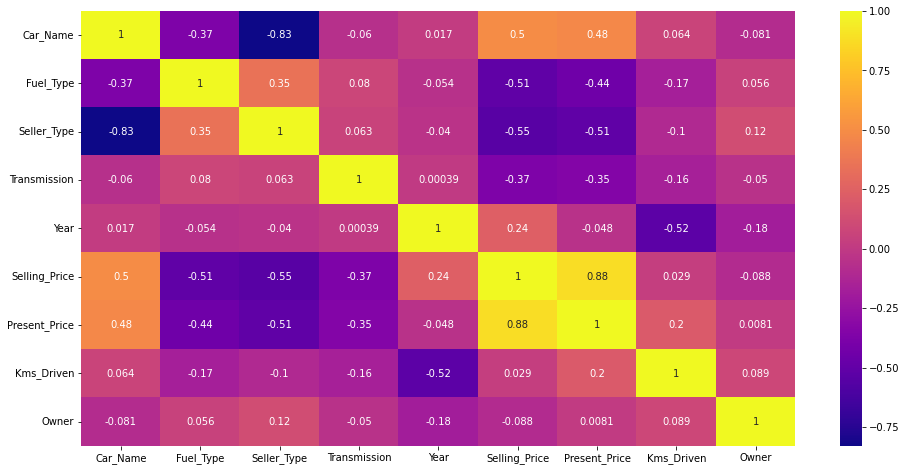

In [ ]:
# Showing the relationship (correlation) between data
corr = car_df.corr()
print(corr)
plt.figure(figsize = (16,8))
sns.heatmap(data=corr,annot=True,cmap='plasma')

## Splitting data into the training data and Testing data


In [ ]:
# Here is the code for dependent variable(y) and Independent variable(X)
X = car_df.drop(['Car_Name','Selling_Price'],axis=1)
y = car_df['Selling_Price']

In [ ]:
X

,Fuel_Type,Seller_Type,Transmission,Year,Present_Price,Kms_Driven,Owner
0,2,0,1,2014,5.59,27000,0
1,1,0,1,2013,9.54,43000,0
2,2,0,1,2017,9.85,6900,0
3,2,0,1,2011,4.15,5200,0
4,1,0,1,2014,6.87,42450,0
...,...,...,...,...,...,...,...
296,1,0,1,2016,11.60,33988,0
297,2,0,1,2015,5.90,60000,0
298,2,0,1,2009,11.00,87934,0
299,1,0,1,2017,12.50,9000,0


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
# Here is the code for Splitting data into the training data and Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

## Model Training

In [ ]:
# Loading the linear regression model
model = LinearRegression()

In [ ]:
# Fitting the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Prediction on the training data
train_data_pred = model.predict(X_train)

In [ ]:
# R squared Error(train)
train_error_score = metrics.r2_score(y_train,train_data_pred )
print("R squared Error for train data : ", train_error_score)

R squared Error for train data :  0.8799451660493717


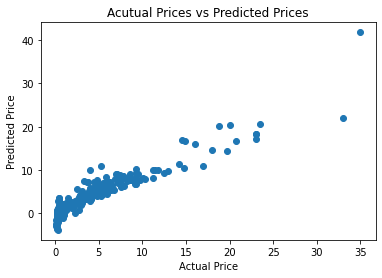

In [ ]:
# Visulaize the actual price and the predicted price on training data
plt.scatter(y_train,train_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Acutual Prices vs Predicted Prices')
plt.show()

In [ ]:
# Prediction on the testing data
test_data_pred = model.predict(X_test)

In [ ]:
# R squared Error(test)
test_error_score = metrics.r2_score(y_test,test_data_pred )
print("R squared Error for train data : ", test_error_score)

R squared Error for train data :  0.8365766715025025


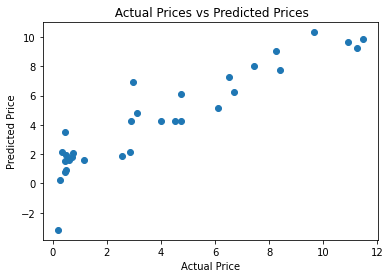

In [ ]:
# Visulaize the actual price and the predicted price on testing data
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# mean_absolute_error
mean_absolute_error(y_test,test_data_pred)

1.1516382156623135

In [ ]:
# mean_squared_error
np.sqrt(mean_squared_error(y_test,test_data_pred))

1.4663321311988957

In [ ]:
# Residual
test_residual = (y_test - test_data_pred)
test_residual

99    -0.678929
161   -0.321657
89     0.485177
30    -1.689850
232    1.562984
290    0.251768
35    -3.975370
7     -0.793211
183    0.050495
13     0.914724
269    0.461760
65    -1.327610
178   -1.821693
258    0.623880
227    0.650120
133   -1.076359
130   -1.350011
156   -1.439532
237    2.000230
262   -0.252915
112   -0.419912
282   -0.799490
164   -1.075612
275    1.245814
154   -0.396313
29    -0.541876
141   -0.999295
192    3.376809
216   -1.346540
3      0.724298
159   -3.046549
Name: Selling_Price, dtype: float64

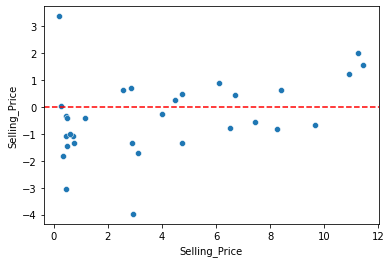

In [ ]:
sns.scatterplot(x=y_test,y=test_residual)
plt.axhline(y=0, color='red' ,ls='--')

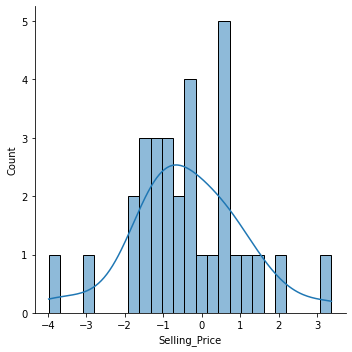

In [ ]:
sns.displot(test_residual, bins=25,kde=True)

In [ ]:
import scipy as sp

((array([-2.01197163, -1.6105163 , -1.36883603, -1.1880445 , -1.03948072,
         -0.91090285, -0.79586259, -0.69050407, -0.59231064, -0.49952733,
         -0.41086261, -0.32532036, -0.24209833, -0.16052274, -0.08000327,
          0.        ,  0.08000327,  0.16052274,  0.24209833,  0.32532036,
          0.41086261,  0.49952733,  0.59231064,  0.69050407,  0.79586259,
          0.91090285,  1.03948072,  1.1880445 ,  1.36883603,  1.6105163 ,
          2.01197163]),
  array([-3.97536953, -3.04654935, -1.8216932 , -1.68985002, -1.43953211,
         -1.35001123, -1.34653988, -1.32761019, -1.07635895, -1.07561157,
         -0.99929505, -0.79949049, -0.79321065, -0.67892855, -0.54187626,
         -0.419912  , -0.39631315, -0.32165673, -0.25291486,  0.05049486,
          0.25176807,  0.46176036,  0.48517676,  0.62388027,  0.65012042,
          0.7242985 ,  0.91472418,  1.24581413,  1.56298432,  2.00022994,
          3.37680912])),
 (1.4733336262347196, -0.3549891234995545, 0.9811407333307334))

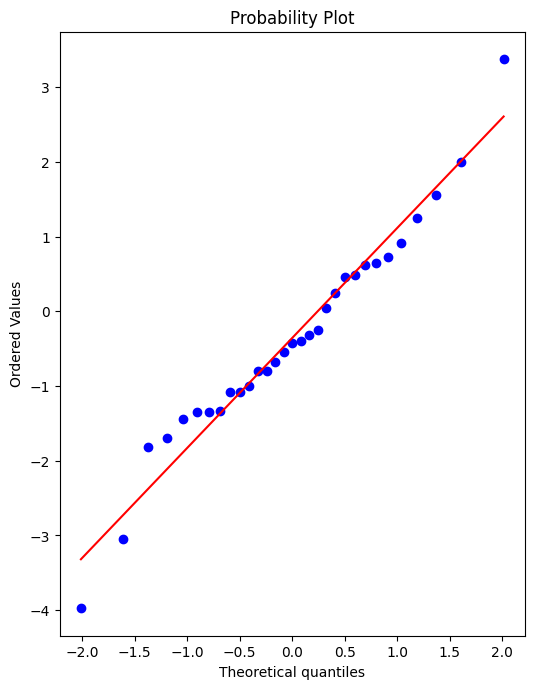

In [ ]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
sp.stats.probplot(test_residual,plot=ax)

## Deployment


In [ ]:
# create a model instance
final_model = LinearRegression()

In [ ]:
# note we are using full x and y
final_model.fit(X,y)

LinearRegression()

In [ ]:
final_model.coef_

array([-1.49298752e+00, -1.10367889e+00, -1.43041666e+00,  4.03947271e-01,
        4.45986832e-01, -6.37410323e-06, -6.80557441e-01])

In [ ]:
X.head()

,Fuel_Type,Seller_Type,Transmission,Year,Present_Price,Kms_Driven,Owner
0,2,0,1,2014,5.59,27000,0
1,1,0,1,2013,9.54,43000,0
2,2,0,1,2017,9.85,6900,0
3,2,0,1,2011,4.15,5200,0
4,1,0,1,2014,6.87,42450,0


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Save model


In [ ]:
from joblib import dump,load

In [ ]:
dump(final_model,'final_model.joblid')

['final_model.joblid']

In [ ]:
load_model = load('final_model.joblid')

In [ ]:
load_model.coef_

array([-1.49298752e+00, -1.10367889e+00, -1.43041666e+00,  4.03947271e-01,
        4.45986832e-01, -6.37410323e-06, -6.80557441e-01])

In [ ]:
X.shape

(301, 7)

In [ ]:
# New data for car price prediction
############Input = [[Fuel_Type,	Seller_Type,Transmission,Year,Present_Price,Kms_Driven,	Owner]]
new_data = [[1,0,1,2015,6.02,8000,1]]

In [ ]:
load_model.predict(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([5.40566362])